Convert pdf to readable format for python NLP.

First, mount google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Change the working directory to a folder in your drive. This is important because the new build of anaconda and linux will save to this folder.

In [ ]:
%cd /content/drive/My Drive/Data/OCVED/Sedena
!ls


/content/drive/My Drive/Data/OCVED/Sedena
Anaconda3-5.1.0-Linux-x86_64.sh  extract  pdf  txt  txt_spa


Clean install of python below.

In [ ]:

!sudo apt-get install -y python python-dev python-pip build-essential swig git libpulse-dev




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

Package python is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  2to3 python2-minimal python2 dh-python python-is-python3

E: Package 'python' has no installation candidate
E: Package 'python-dev' has no installation candidate


Now install a clean version of anaconda for linux into the virtual machine.

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh


#!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh




--2023-07-24 14:18:32--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2023-07-24 14:18:32--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   202MB/s    in 2.7s    

2023-07-24 14:18:35 (202 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

In [ ]:
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y --prefix /usr/local -c conda-forge poppler

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a8_4 ...
installing: expat-2.2.5-he0dffb1_0 ...
installing: gmp-6.1.2-h6c8ec71_1 ...
installing: graphite2-1.3.10-hf63cedd_1 ...
installing: icu-58.2-h9c2bf20_1 ...
installing: jbig-2.1-hdba287a_0 ...
installing: jpeg-9b-h024ee3a_2 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: libsodium-1.0.15-hf101ebd_0 ...
installing: libtool-2.4.6-h544aabb_3 ...
installing: libxcb-1.12-hcd93eb1_4 ...
installing: lzo-2.10-h49e0be7_2 ...
installing: mkl-2018.0.1-h19d6760_4 ...
installing: ncurses-6.0-h9df7e31_2 ...
installing: openssl-1.0.2n-hb7f436b_0 ...
installing: patchelf-0.9-hf79760b_2 ...
i

Poppler is the reason we are creating this virtual enviornment in this virtual machine using a virtual version of developer python.

Make sure the system is calling the location of where the python packages are being saved to.

In [ ]:
!conda install -c conda-forge poppler

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')
#!conda install -c conda-forge poppler

tesseract is the software that does the OCR.

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,520 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

Below are the packages required. We are using textract from Amazon to do the conversion in series. Textract is flexible and allows for ocr in Spanish.

In [ ]:
!apt-get install PyPDF2
!pip install textract
!pip install nltk
!pip install pytesseract
!pip install pdftoppm
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package PyPDF2
Traceback (most recent call last):
  File "/usr/local/bin/pip", line 7, in <module>
    from pip import main
  File "/usr/local/lib/python3.6/site-packages/pip/__init__.py", line 28, in <module>
    from pip.vcs import git, mercurial, subversion, bazaar  # noqa
  File "/usr/local/lib/python3.6/site-packages/pip/vcs/mercurial.py", line 9, in <module>
    from pip.download import path_to_url
  File "/usr/local/lib/python3.6/site-packages/pip/download.py", line 36, in <module>
    from pip.utils.glibc import libc_ver
  File "/usr/local/lib/python3.6/site-packages/pip/utils/glibc.py", line 4, in <module>
    import ctypes
  File "/usr/local/lib/python3.6/ctypes/__init__.py", line 7, in <module>
    from _ctypes import Union, Structure, Array
ImportError: libffi.so.6: cannot open shared object file: No such file or directory
Traceback (most recent call last):
 

Confirm the system path is at the same location where packages are being saved.

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')
import PyPDF2
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm_notebook as tqdm
import glob
import os
import pandas as pd
import zipfile

# OCRing

I upload files in Zip because colab takes too long to read individual files.

In [ ]:
for filename in tqdm(glob.glob("pdf/*.zip")):
    zip_ref = zipfile.ZipFile(filename, 'r')
    zip_ref.extractall('pdf/') #destination folder
    zip_ref.close()

extract the files to a folder. then confirm it has the total number of desired files.

In [ ]:
total = len(glob.glob('pdf/*/*.pdf'))
print (total)

1517


I was missing some packages and this command helps get everything that the updated textract needs for converting the files.

In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr \
flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate
Traceback (most recent call last):
  File "/usr/local/bin/pip", line 7, in <module>
    from pip import main
  File "/usr/local/lib/python3.6/site-packages/pip/__init__.py", line 28, in <module>
    from pip.vcs import git, mercurial, subversion, bazaar  # noqa
  File "/usr/local/lib/python3.6/site-packages/pip/vcs/mercurial.py", line 9, in <module>
    from pip.download import path_to_url
  File "/usr/local/lib/python3.6/site-packages/pip/download.py", line 36, in <module>
    from pip.utils.glibc import libc_ver
  File "/usr/local/lib/python3.6/site-packages/pip/utils/glib

Need to install the tesseract version in Spanish.

In [ ]:
!sudo apt-get install tesseract-ocr-spa  #for spanish

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-spa all 1:4.00~git30-7274cfa-1.1 [951 kB]
Fetched 951 kB in 1s (967 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-spa.
(Reading databas

The below loop reads each file in the folder, converts them into text using the tesseract OCR in spanish. We save the text as an object in python, convert it to string. Then save the file in new destination. I also add a command for generating CSV because csv's are easier to read in in the future.

In [ ]:
df = pd.DataFrame()
for file in tqdm(glob.glob('pdf/*/*.pdf')):
  text = textract.process(file, method='tesseract', encoding ='utf-8', language = 'spa')
  content = str(text, encoding='utf-8')
  filename = os.path.basename(file)
  filename = filename.replace('pdf', 'txt')
  file_name = 'txt_spa/' + filename
  df = df.append({"file_id" : filename, "content" : content}, ignore_index=True)
  with open (file_name, 'w', encoding = 'utf-8') as f:
    f.write(content)

In [ ]:
df.to_csv('Sedena_2000-2006.csv', index=False, encoding='utf-8')
df.head()

,content,file_id
0,"Swap pr ""n\n\nDEA\nAODAL\n\nOIRECCION OENERAL ...",20050622001_SEDENA.txt
1,DIRECCIDA GENERAL DE\nCOMUNICACIÓN SOCIAL.\n\n...,20050622002_SEDENA.txt
2,AN ht r-A\n\nnaco\n\nDIRECCION. GENERAL PE\nCO...,20050623001_SEDENA.txt
3,DIRECCION GENERAL DE\nCOMUNICACIÓN SOCIAL\n\nC...,20050624002_SEDENA.txt
4,"co | t IN\nPOB o o\n\nvacio,\n\nDIRECCION GENE...",20050625001_SEDENA.txt


# Word Cloud

Here I make a word cloud for the OCR text.

In [ ]:
import nltk
nltk.download('stopwords')
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("spanish"))
##Creating a list of custom stopwords
new_words = ["daily", "newspaper", "reforma", "publication", "universal", "El", "La", "mas", "En", "Publication", "News", "si", "Reforma",
            "Daily", "Newspaper", "ser", "Los", "dijo", "tambien" , "anos", "parte", "UNIVERSAL", "solo", "caso", "dos", "estan", "Por", "ayer",
            "pues", "ayer", "puede", "De", "asi", "hacer", "tres", "hace", "·", "sido", "hoy", "mismo", "hizo", "Pero", "Para", "Sin", "sera", "Si",
            "aunque", "habia", "Es", "cada", "luego", "bien", "sino", "ahora", "bien", "vez", "dia", "news"]
stop_words = stop_words.union(new_words)

In [ ]:
import re
dataset = df
corpus = []
for i in dataset.itertuples():
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i.content)

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    #text = [lem.lemmatize(word) for word in text if not word in
    #        stop_words]
    text = " ".join(text)
    corpus.append(text)

corpus

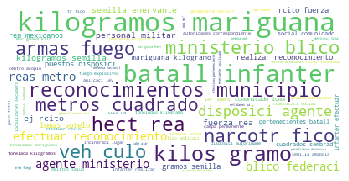

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Sedena_word_cloud.png", dpi=900)